In [74]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
assets = ['WMT', 'META', 'AAPL', 'NKE', 'GOOGL', 'AMZN']
df = pd.DataFrame()

for a in assets:
    df[a] = wb.DataReader(a, data_source = 'yahoo', start='2018/01/01', end='2019/12/31')['Adj Close']

In [109]:
df.head()

,WMT,META,AAPL,NKE,GOOGL,AMZN
Date,,,,,,
2018-01-02,90.707512,181.419998,41.075417,60.787495,1073.209961,59.450500
2018-01-03,91.498756,184.669998,41.068249,60.777927,1091.520020,60.209999
2018-01-04,91.581589,184.330002,41.259014,60.739624,1095.760010,60.479500
2018-01-05,92.124397,186.850006,41.728752,61.256638,1110.290039,61.457001
2018-01-08,93.486069,188.279999,41.573765,61.802368,1114.209961,62.343498


In [110]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,WMT,META,AAPL,NKE,GOOGL,AMZN
WMT,0.000156,0.000044,0.000056,0.000066,0.000051,0.000069
META,0.000044,0.000457,0.000167,0.000091,0.000209,0.000238
AAPL,0.000056,0.000167,0.000303,0.000122,0.000178,0.000206
NKE,0.000066,0.000091,0.000122,0.000253,0.000119,0.000139
GOOGL,0.000051,0.000209,0.000178,0.000119,0.000269,0.000216
AMZN,0.000069,0.000238,0.000206,0.000139,0.000216,0.000363


In [111]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,WMT,META,AAPL,NKE,GOOGL,AMZN
WMT,1.000000,0.163643,0.258288,0.331310,0.247261,0.289535
META,0.163643,1.000000,0.449593,0.268056,0.595956,0.583774
AAPL,0.258288,0.449593,1.000000,0.439668,0.621639,0.620294
NKE,0.331310,0.268056,0.439668,1.000000,0.453669,0.458711
GOOGL,0.247261,0.595956,0.621639,0.453669,1.000000,0.692366
AMZN,0.289535,0.583774,0.620294,0.458711,0.692366,1.000000


<AxesSubplot:xlabel='Date'>

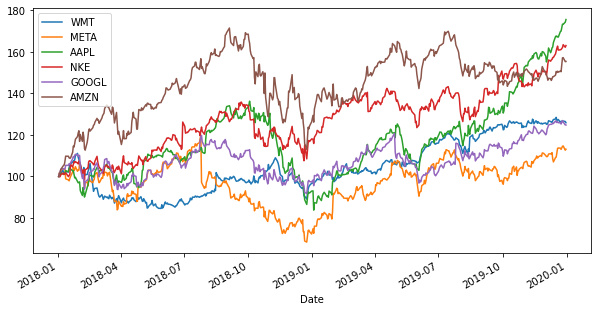

In [112]:
(df / df.iloc[0] * 100).plot(figsize=(10, 5))

In [113]:
w = {'AAPL': 0.1, 'NKE': 0.1, 'GOOGL': 0.3, 'AMZN': 0.1, 'WMT': 0.2, 'META':0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0001601825586833327

In [114]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

WMT      0.301630
META     0.565718
AAPL     0.889578
NKE      0.380940
GOOGL    0.281762
AMZN     0.230277
dtype: float64

In [115]:
# Portfolio returns
w = [0.1, 0.1, 0.3, 0.1, 0.2, 0.2]
port_er = (w*ind_er).sum()
port_er

0.4941102190578688

In [116]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

WMT      0.197462
META     0.337999
AAPL     0.275126
NKE      0.251737
GOOGL    0.259518
AMZN     0.301127
dtype: float64

In [117]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
WMT,0.301630,0.197462
META,0.565718,0.337999
AAPL,0.889578,0.275126
NKE,0.380940,0.251737
GOOGL,0.281762,0.259518
AMZN,0.230277,0.301127


In [118]:
p_ret = [] 
p_vol = [] 
p_weights = [] 

num_assets = len(df.columns)
num_portfolios = 10000

In [119]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [120]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
      data[symbol+' weight'] = [w[counter] for w in p_weights]

In [121]:
portfolios  = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,WMT weight,META weight,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.424862,0.207703,0.134792,0.294870,0.068711,0.199977,0.206364,0.095284
1,0.405583,0.204647,0.113034,0.108637,0.131874,0.191352,0.291830,0.163273
2,0.410883,0.214805,0.049410,0.153130,0.119282,0.248904,0.185886,0.243388
3,0.505138,0.202094,0.211742,0.311656,0.201389,0.106579,0.123861,0.044773
4,0.369966,0.193160,0.195898,0.165608,0.025523,0.305361,0.142288,0.165322


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

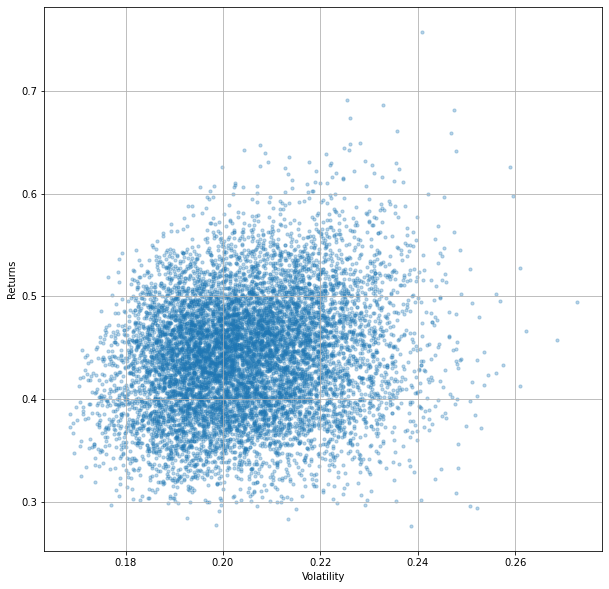

In [122]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [123]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
    
min_vol_port

Returns         0.385318
Volatility      0.168502
WMT weight      0.577480
META weight     0.098574
AAPL weight     0.069714
NKE weight      0.226280
GOOGL weight    0.013896
AMZN weight     0.014056
Name: 1060, dtype: float64

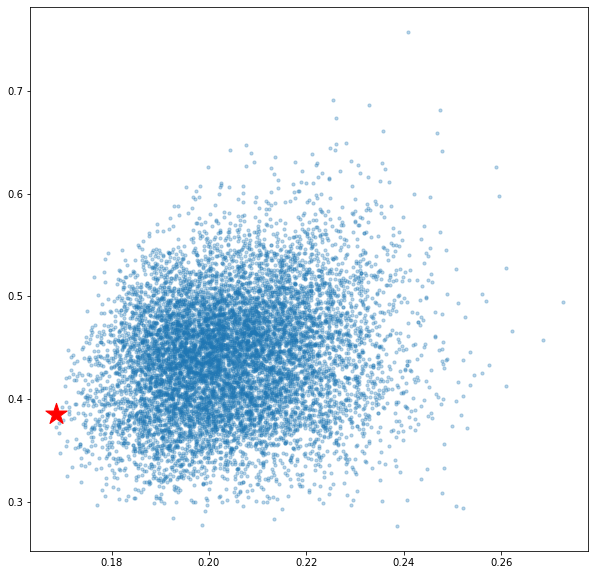

In [124]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [125]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.757527
Volatility      0.240782
WMT weight      0.077902
META weight     0.032494
AAPL weight     0.762600
NKE weight      0.026294
GOOGL weight    0.078595
AMZN weight     0.022114
Name: 3953, dtype: float64

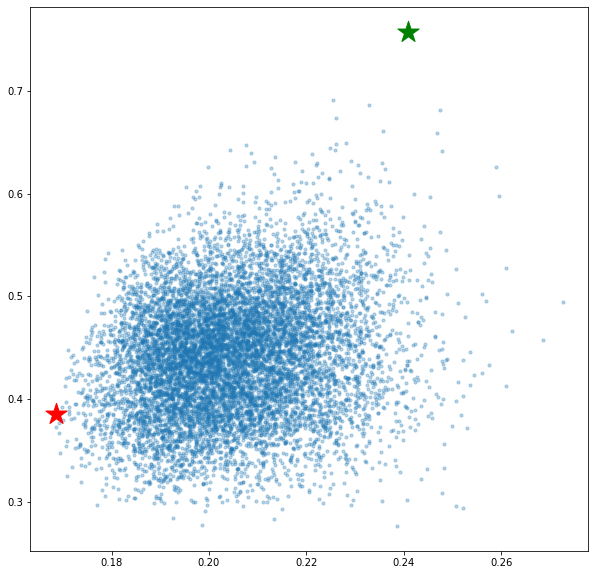

In [126]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)